## Data Augmentation
In the real world scenario, the images to predict its class from the model might be encounter various changes from the training dataset. The images might:

- be rotated slightly 
- be zoomed in/out (scaled)
- have amount of noise 
- have low brightness 
- have been flipped
- have been sheared (one side is more twisted)

So, any neural net doesn't take into account these changes won't provide accurate results.

With **image augmentation**, we can create more images with various changes from the given images in the training dataest. Each of the created images can vary in term of rotation, translation, scale, noise, and brightness.

The **augmenters class** in the **imgaug** package has useful utilities for performing these augmentations. It provides techniques such as:
1. Affine Transformations
2. Change Brightness
3. Adding Noise.

In [1]:
from torchvision import datasets
import torch 
import matplotlib.pyplot as plt
%matplotlib inline
from imgaug import augmenters as iaa

In [2]:
data_folder = "Datasets"                         
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
train_images = fmnist.data                               
train_targets = fmnist.targets

In [3]:
fmnist.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### Affine Transformation 
Affine transformations involve translating, rotating, scaling, and shearing an image.

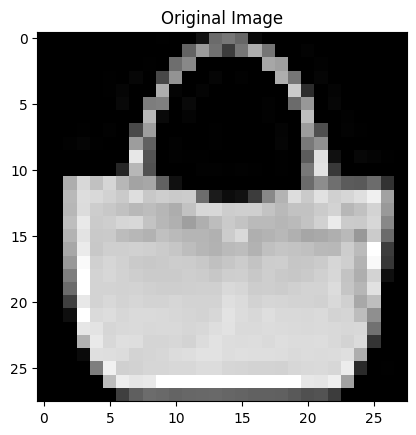

In [4]:
plt.imshow(train_images[100], cmap='gray')
plt.title("Original Image")
plt.show()

In [5]:
def to_numpy(tensor):
    """Create numpy array for tensor object"""
    
    return tensor.cpu().detach().numpy()

In [6]:
aug = iaa.Affine(scale=0.5)  #scale parameters specifies the amount of zoom be done to the image

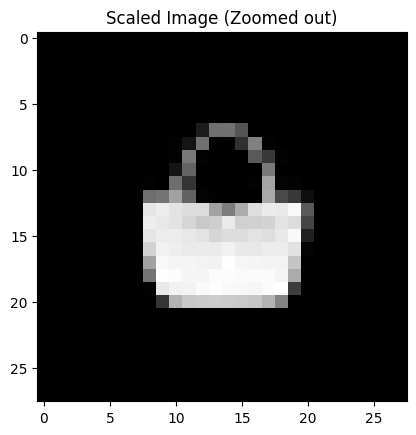

In [7]:
plt.imshow(aug.augment_image(to_numpy(train_images[100])),cmap='gray')
plt.title("Scaled Image (Zoomed out)")
plt.show()

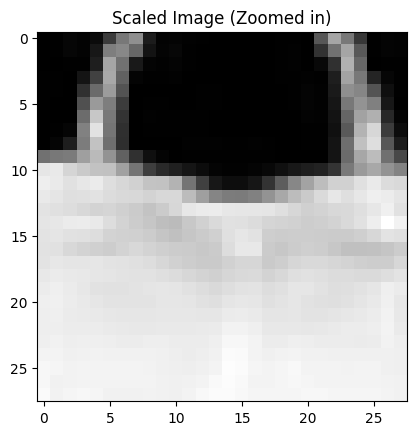

In [8]:
aug = iaa.Affine(scale=1.5)
plt.imshow(aug.augment_image(to_numpy(train_images[100])),cmap='gray')
plt.title("Scaled Image (Zoomed in)")
plt.show()

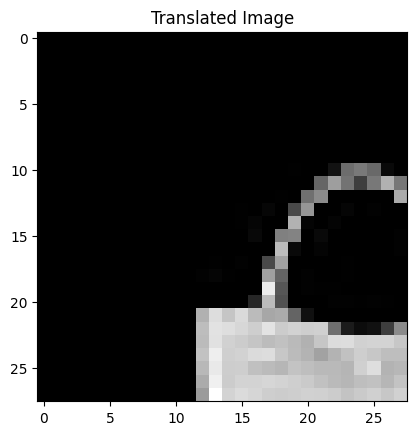

In [9]:
aug = iaa.Affine(translate_px=10)      #translate the image by a certain number of pixels to both x,y aixes
plt.imshow(aug.augment_image(to_numpy(train_images[100])),cmap='gray')
plt.title("Translated Image")
plt.show()

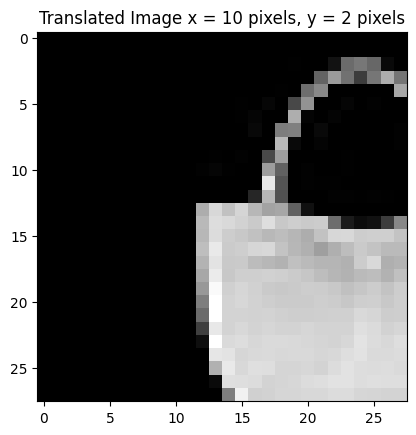

In [10]:
aug = iaa.Affine(translate_px={'x':10, 'y':2})
plt.imshow(aug.augment_image(to_numpy(train_images[100])),cmap='gray')
plt.title("Translated Image x = 10 pixels, y = 2 pixels")
plt.show()

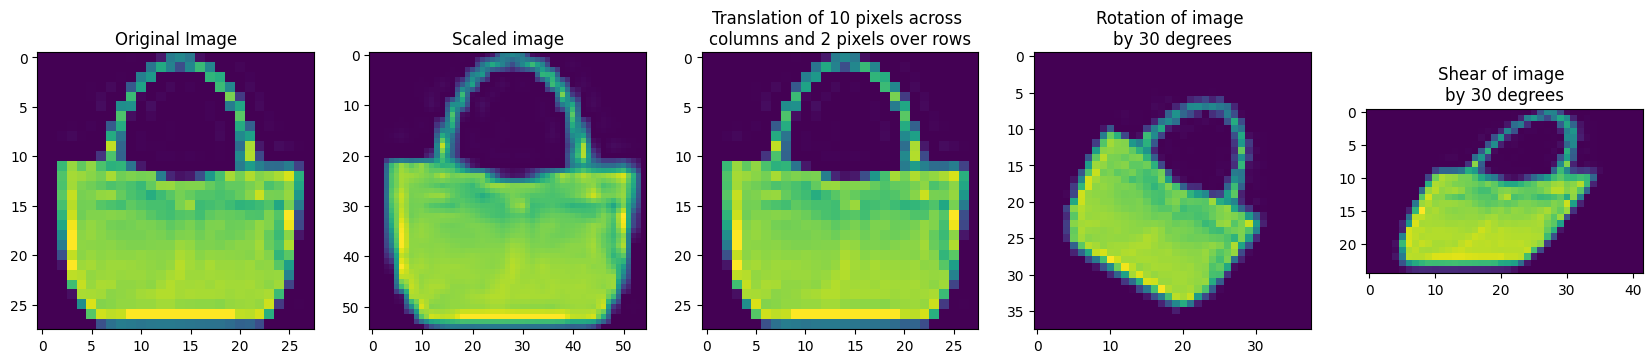

In [13]:
plt.figure(figsize=(25,25))
plt.subplot(161)
plt.imshow(train_images[100])
plt.title('Original Image')
plt.subplot(162)
aug = iaa.Affine(scale=2, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(train_images[100])))
plt.title('Scaled image')
plt.subplot(163)
aug = iaa.Affine(translate_px={'x':10,'y':2}, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(train_images[100])))
plt.title('Translation of 10 pixels across \ncolumns and 2 pixels over rows')
plt.subplot(164)
aug = iaa.Affine(rotate=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(train_images[100])))
plt.title('Rotation of image \nby 30 degrees')
plt.subplot(165)
aug = iaa.Affine(shear=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(train_images[100])))
plt.title('Shear of image \nby 30 degrees')
plt.show()

### Changing the Brightness

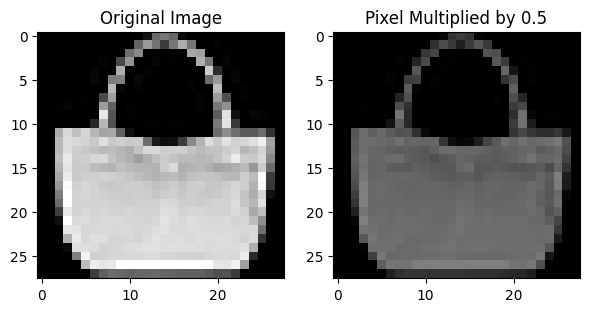

In [26]:
plt.figure(figsize=(7,7))
aug = iaa.Multiply(0.5)
plt.subplot(121)
plt.imshow(to_numpy(train_images[100]),cmap='gray',vmin = 0, vmax = 255)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(aug.augment_image(to_numpy(train_images[100])),cmap='gray', vmin = 0, vmax = 255)
plt.title('Pixel Multiplied by 0.5')
plt.show()


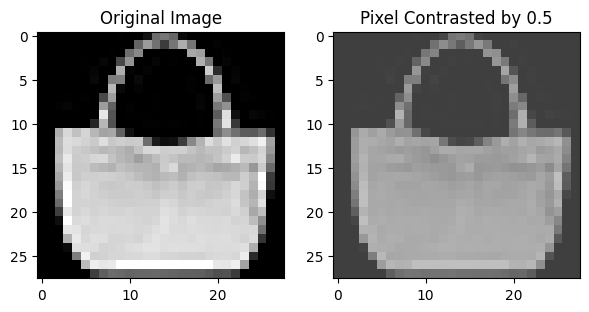

In [27]:
plt.figure(figsize=(7,7))
aug = iaa.LinearContrast(0.5)
plt.subplot(121)
plt.imshow(to_numpy(train_images[100]),cmap='gray',vmin = 0, vmax = 255)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(aug.augment_image(to_numpy(train_images[100])),cmap='gray', vmin = 0, vmax = 255)
plt.title('Pixel Contrasted by 0.5')
plt.show()

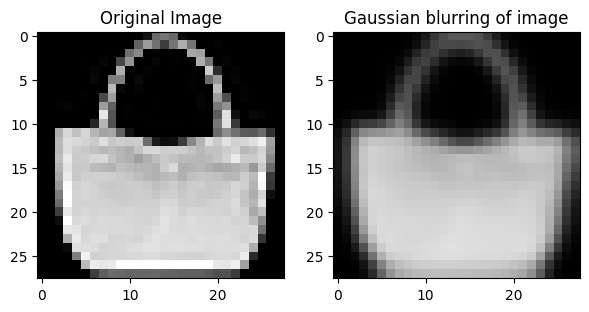

In [29]:
plt.figure(figsize=(7,7))
aug = iaa.GaussianBlur(sigma=1)
plt.subplot(121)
plt.imshow(to_numpy(train_images[100]),cmap='gray',vmin = 0, vmax = 255)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(aug.augment_image(to_numpy(train_images[100])),cmap='gray', vmin = 0, vmax = 255)
plt.title('Gaussian blurring of image')
plt.show()

### Adding Noise 

In a real-world scenario, we may encounter grainy images due to bad photography conditions. Dropout and SaltAndPepper are two prominent methods that can help in simulating grainy image conditions.

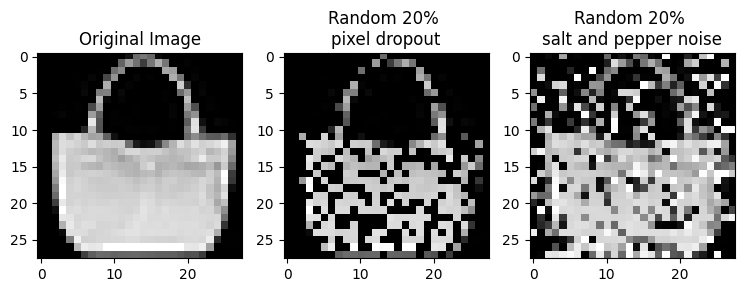

In [38]:
plt.figure(figsize=(9,9))
plt.subplot(131)
plt.imshow(to_numpy(train_images[100]),cmap='gray',vmin=0,vmax=255)
plt.title("Original Image")
plt.subplot(132)
aug = iaa.Dropout(p=0.4)
plt.imshow(aug.augment_image(to_numpy(train_images[100])),cmap='gray',vmin=0,vmax=255)
plt.title('Random 20% \npixel dropout')
plt.subplot(133)
aug = iaa.SaltAndPepper(0.4)
plt.imshow(aug.augment_image(to_numpy(train_images[100])),cmap='gray',vmin=0,vmax=255)
plt.title('Random 20% \nsalt and pepper noise')
plt.show()

### Performing a Sequence of Augmentations

In [39]:
sequence = iaa.Sequential(
                    [iaa.Dropout(p=0.4),
                    iaa.Affine(rotate=(-45,45))], random_order=True)

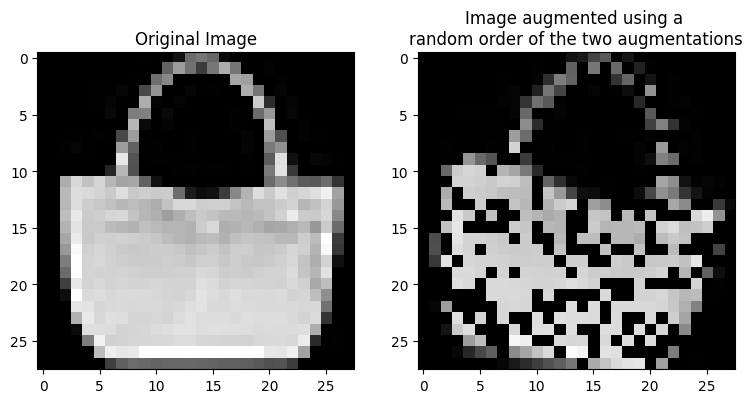

In [42]:
plt.figure(figsize=(9,9))
plt.subplot(121)
plt.imshow(to_numpy(train_images[100]),cmap='gray',vmin=0,vmax=255)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(sequence.augment_image(to_numpy(train_images[100])),cmap='gray',vmin=0,vmax=255)
plt.title('Image augmented using a \nrandom order of the two augmentations')
plt.show()